# RSNA STR Pulmonary Embolism Detection

Classify Pulmonary Embolism cases in chest CT scans

In [1]:
import cv2
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import pandas as pd
import pydicom

Populating the interactive namespace from numpy and matplotlib


In [2]:
!python -m pip install pillow

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [3]:
df_train = pd.read_csv('/kaggle/input/rsna-str-pulmonary-embolism-detection/train.csv')
df_train.head()

,StudyInstanceUID,SeriesInstanceUID,SOPInstanceUID,pe_present_on_image,negative_exam_for_pe,qa_motion,qa_contrast,flow_artifact,rv_lv_ratio_gte_1,rv_lv_ratio_lt_1,leftsided_pe,chronic_pe,true_filling_defect_not_pe,rightsided_pe,acute_and_chronic_pe,central_pe,indeterminate
0,6897fa9de148,2bfbb7fd2e8b,c0f3cb036d06,0,0,0,0,0,0,1,1,0,0,1,0,0,0
1,6897fa9de148,2bfbb7fd2e8b,f57ffd3883b6,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,6897fa9de148,2bfbb7fd2e8b,41220fda34a3,0,0,0,0,0,0,1,1,0,0,1,0,0,0
3,6897fa9de148,2bfbb7fd2e8b,13b685b4b14f,0,0,0,0,0,0,1,1,0,0,1,0,0,0
4,6897fa9de148,2bfbb7fd2e8b,be0b7524ffb4,0,0,0,0,0,0,1,1,0,0,1,0,0,0


## Analysing slices

In [4]:
df_train_pe_positives = df_train.query('negative_exam_for_pe == 0')
total_positives = len(df_train_pe_positives)
total_positives

579449

In [5]:
df_train_pe_negatives = df_train.query('negative_exam_for_pe == 1')
total_negatives = len(df_train_pe_negatives)
total_negatives

1211145

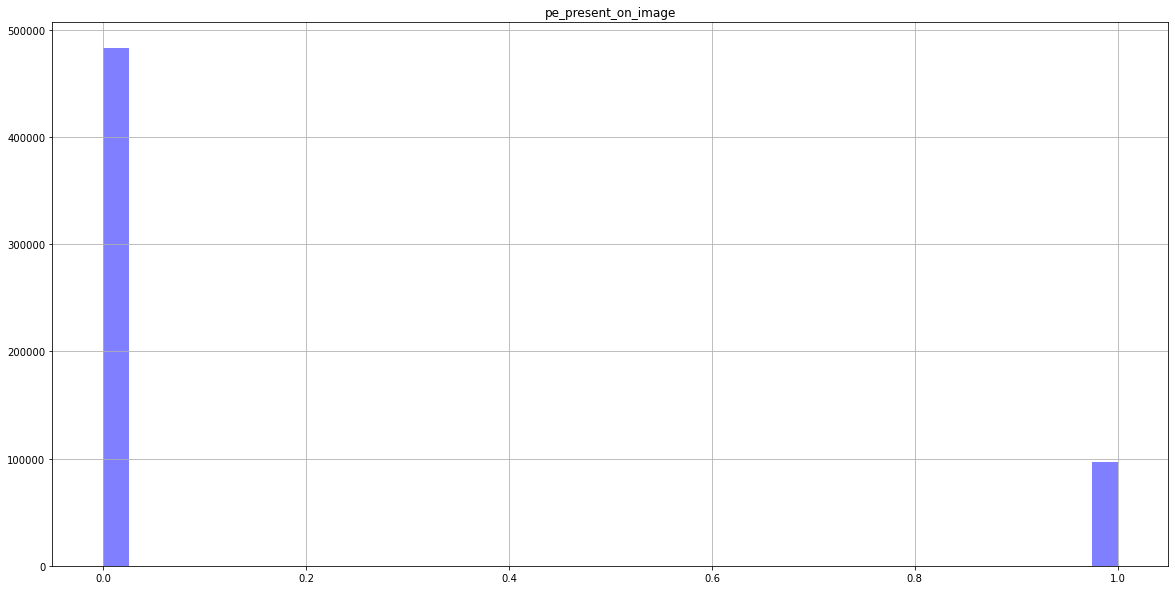

In [6]:
df_train_pe_positives.hist(column = 'pe_present_on_image', bins = 40, color = 'blue', alpha = 0.5, figsize=(20, 10))
plt.show()

In [7]:
positives_pe_present_on_image = df_train_pe_positives.query('pe_present_on_image == 1')
len(positives_pe_present_on_image)

96540

In [8]:
positives_pe_doesnt_present_on_image = df_train_pe_positives.query('pe_present_on_image == 0')
len(positives_pe_doesnt_present_on_image)

482909

In [10]:
def apply_chunk(chunk, dataset):
    path = "kaggle/input/rsna-str-pulmonary-embolism-detection"
    
    data = pd.DataFrame({'StudyInstanceUID': []})

    for index, row in chunk.iterrows():
        StudyInstanceUID = str(row["StudyInstanceUID"])
        SeriesInstanceUID = str(row["SeriesInstanceUID"])
        SOPInstanceUID = str(row["SOPInstanceUID"])

        path_dicom = f'/{path}/{dataset}/{StudyInstanceUID}/{SeriesInstanceUID}/{SOPInstanceUID}.dcm'
        image = pydicom.dcmread(f'/{path_dicom}')

        row['ImagePositionPatient_Z'] = image.ImagePositionPatient[2]
        row['pixel_array'] = image.pixel_array

        data = data.append(row, ignore_index=True)

    return data

In [16]:
p_pe_present = apply_chunk(positives_pe_present_on_image.head(15000), 'train')

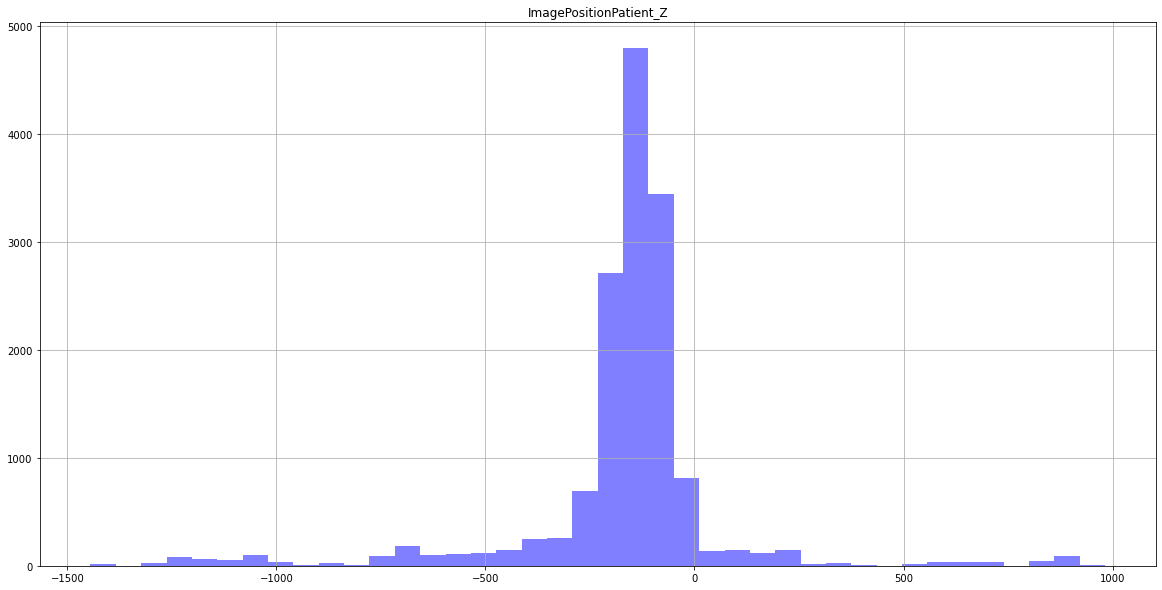

In [17]:
p_pe_present.hist(column = 'ImagePositionPatient_Z', bins = 40, color = 'blue', alpha = 0.5, figsize=(20, 10))
plt.show()